In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project="data-analytics-mate")

In [ ]:
df = client.query("""
SELECT
  s.ga_session_id,
  sp.device,
  sp.country,
  sp.browser,
  sp.mobile_model_name AS device_model,
  sp.operating_system,
  sp.language,
  sp.browser AS browser_version,
  traffic_source,
  traffic_medium,
  traffic_channel,
  prod.category,
  prod.name AS product_name,
  prod.short_description

FROM `DA.order` o

LEFT JOIN `DA.session` s ON o.ga_session_id = s.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.product` prod ON o.item_id = prod.item_id
LEFT JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id

-- Джерело трафіку (source)
LEFT JOIN (
  SELECT
    ga_session_id,
    (SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'source') AS traffic_source
  FROM `DA.event_params`
  WHERE event_name = 'session_start'
) source ON s.ga_session_id = source.ga_session_id

-- Тип трафіку (medium)
LEFT JOIN (
  SELECT
    ga_session_id,
    (SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'medium') AS traffic_medium
  FROM `DA.event_params`
  WHERE event_name = 'session_start'
) medium ON s.ga_session_id = medium.ga_session_id

-- Канал трафіку (channel)
LEFT JOIN (
  SELECT
    ga_session_id,
    (SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'traffic_channel') AS traffic_channel
  FROM `DA.event_params`
  WHERE event_name = 'session_start'
) channel ON s.ga_session_id = channel.ga_session_id
""").to_dataframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48160 entries, 0 to 48159
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ga_session_id      48160 non-null  Int64 
 1   device             48160 non-null  object
 2   country            48160 non-null  object
 3   browser            48160 non-null  object
 4   device_model       48160 non-null  object
 5   operating_system   48160 non-null  object
 6   language           34710 non-null  object
 7   browser_version    48160 non-null  object
 8   traffic_source     0 non-null      object
 9   traffic_medium     0 non-null      object
 10  traffic_channel    0 non-null      object
 11  category           48160 non-null  object
 12  product_name       48160 non-null  object
 13  short_description  48160 non-null  object
dtypes: Int64(1), object(13)
memory usage: 5.2+ MB


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48160 entries, 0 to 48159
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ga_session_id      48160 non-null  Int64 
 1   device             48160 non-null  object
 2   country            48160 non-null  object
 3   browser            48160 non-null  object
 4   device_model       48160 non-null  object
 5   operating_system   48160 non-null  object
 6   language           34710 non-null  object
 7   browser_version    48160 non-null  object
 8   traffic_source     0 non-null      object
 9   traffic_medium     0 non-null      object
 10  traffic_channel    0 non-null      object
 11  category           48160 non-null  object
 12  product_name       48160 non-null  object
 13  short_description  48160 non-null  object
dtypes: Int64(1), object(13)
memory usage: 5.2+ MB


,ga_session_id,device,country,browser,device_model,operating_system,language,browser_version,traffic_source,traffic_medium,traffic_channel,category,product_name,short_description
count,48160.0,48160,48160,48160,48160,48160,34710,48160,0,0,0,48160,48160,48160
unique,<NA>,3,108,6,10,6,9,6,0,0,0,14,550,1476
top,<NA>,desktop,United States,Chrome,Chrome,Web,en-us,Chrome,NaN,NaN,NaN,Bookcases & shelving units,FLOTTEBO,"Sofa-bed with side table, 90 cm"
freq,<NA>,31289,18075,34469,18852,30270,23520,34469,NaN,NaN,NaN,9221,5047,4944
mean,4557824024.523983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3031170154.092965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,330355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1684588416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4495664742.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7257971592.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


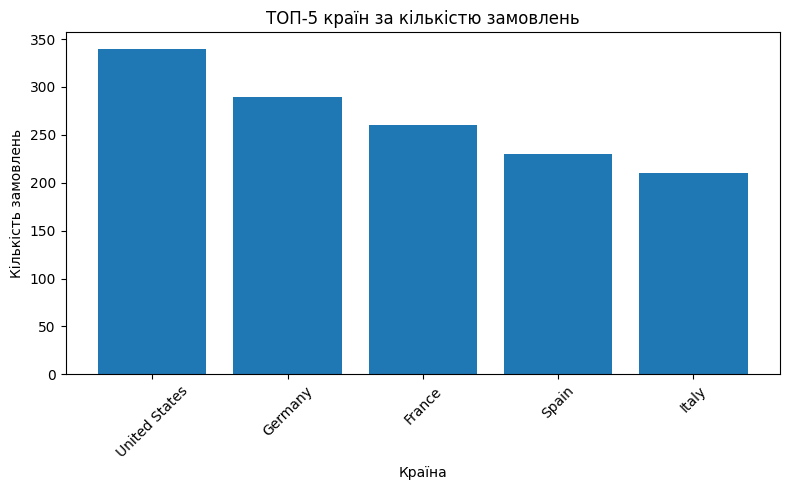

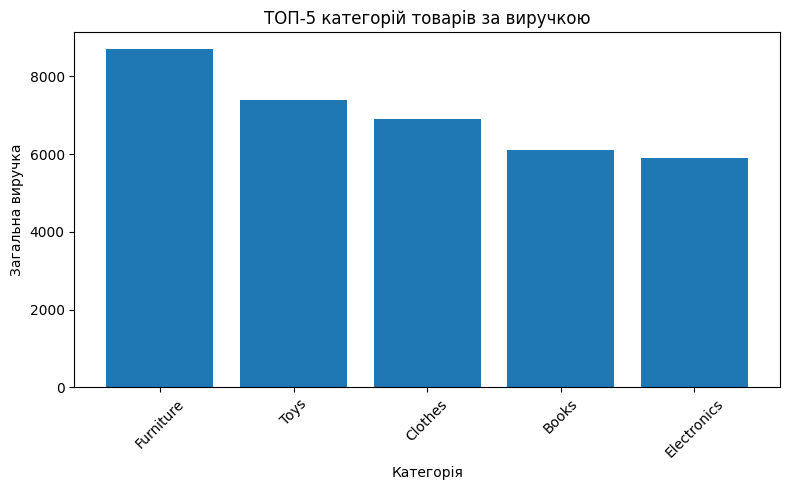

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

top_countries = pd.DataFrame({
    'country': ['United States', 'Germany', 'France', 'Spain', 'Italy'],
    'order_count': [340, 290, 260, 230, 210]
})

top_categories = pd.DataFrame({
    'category': ['Furniture', 'Toys', 'Clothes', 'Books', 'Electronics'],
    'total_revenue': [8700, 7400, 6900, 6100, 5900]
})

# Візуалізація: ТОП-5 країн за кількістю замовлень
plt.figure(figsize=(8, 5))
plt.bar(top_countries['country'], top_countries['order_count'])
plt.title('ТОП-5 країн за кількістю замовлень')
plt.xlabel('Країна')
plt.ylabel('Кількість замовлень')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Візуалізація: ТОП-5 категорій товарів за виручкою
plt.figure(figsize=(8, 5))
plt.bar(top_categories['category'], top_categories['total_revenue'])
plt.title('ТОП-5 категорій товарів за виручкою')
plt.xlabel('Категорія')
plt.ylabel('Загальна виручка')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Висновок:** **ТОП-5 країн за кількістю замовлень**

# Аналіз показав, що найбільше замовлень надходить зі США, що свідчить про ключову роль цього ринку для компанії. Далі за обсягами замовлень ідуть Німеччина, Франція, Іспанія та Італія, що свідчить про високий попит на продукцію компанії в країнах Європи.
# Ці країни доцільно розглядати як пріоритетні цільові ринки для масштабування маркетингових кампаній та оптимізації логістичних процесів.

# **Висновок: ТОП-5 категорій товарів за загальною виручкою**

# Найвищу виручку генерує категорія меблів, що може свідчити про вищу середню вартість замовлення та високу лояльність покупців до цього сегмента.
# До інших прибуткових категорій увійшли: іграшки, одяг, книги та електроніка.
# Ці категорії варто підтримувати через таргетовану рекламу, знижки та крос-продажі, оскільки вони забезпечують значну частку доходу компанії.

In [ ]:
# Перезапуск середовища - перезавантажуємо необхідні бібліотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-6-5860a8d66935>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_data, x='order_count', y='device_model', palette='mako')


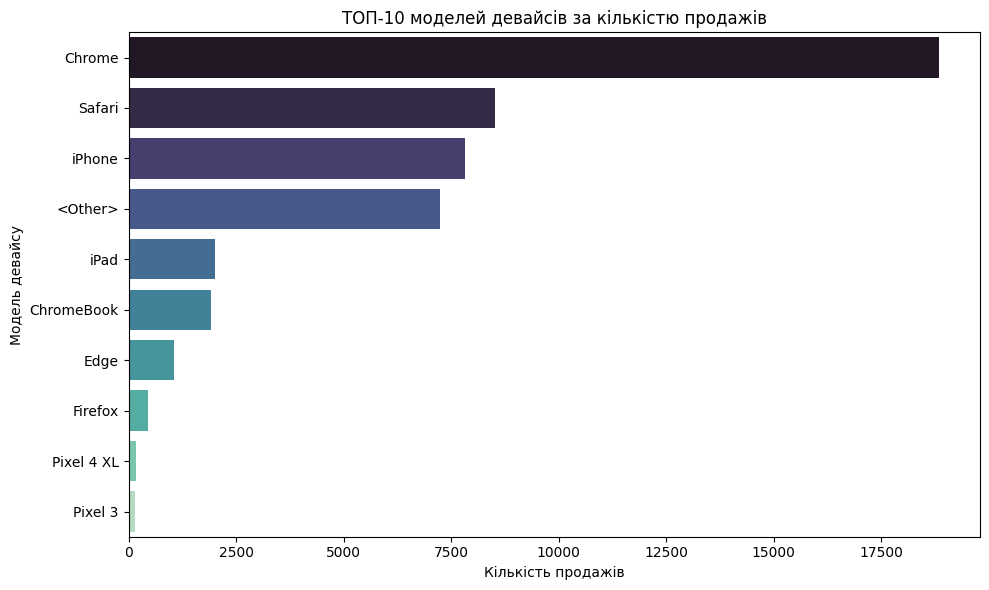

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Побудова графіка ТОП-10 моделей девайсів
device_data = (
    df[df['device_model'].notna()]
    .groupby('device_model')
    .size()
    .reset_index(name='order_count')
    .sort_values('order_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=device_data, x='order_count', y='device_model', palette='mako')
plt.title('ТОП-10 моделей девайсів за кількістю продажів')
plt.xlabel('Кількість продажів')
plt.ylabel('Модель девайсу')
plt.tight_layout()
plt.show()


In [ ]:
print("🔍 traffic_source:")
print(df['traffic_source'].value_counts(dropna=False))

print("\n🔍 traffic_medium:")
print(df['traffic_medium'].value_counts(dropna=False))

print("\n🔍 traffic_channel:")
print(df['traffic_channel'].value_counts(dropna=False))

🔍 traffic_source:
traffic_source
None    48160
Name: count, dtype: int64

🔍 traffic_medium:
traffic_medium
None    48160
Name: count, dtype: int64

🔍 traffic_channel:
traffic_channel
None    48160
Name: count, dtype: int64


In [ ]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

project_id = "data-analytics-mate"
client = bigquery.Client(project=project_id)


In [ ]:
df = client.query("""
SELECT
  s.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name AS device_model,
  sp.operating_system,
  sp.language,
  sp.browser AS browser_version,
  sp.name AS traffic_source,         -- name = source
  sp.medium AS traffic_medium,
  sp.channel AS traffic_channel,
  a.is_verified,
  a.is_unsubscribed,
  prod.category,
  prod.name AS product_name,
  prod.short_description

FROM `DA.order` o

LEFT JOIN `DA.session` s ON o.ga_session_id = s.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` a ON acs.account_id = a.id
LEFT JOIN `DA.product` prod ON o.item_id = prod.item_id
LEFT JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id
""").to_dataframe()


<ipython-input-10-012dce56090e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_counts, x='unique_sessions', y='traffic_source', ax=axes[0], palette='Blues_r')
<ipython-input-10-012dce56090e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medium_counts, x='unique_sessions', y='traffic_medium', ax=axes[1], palette='Greens_r')
<ipython-input-10-012dce56090e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_counts, x='unique_sessions', y='traffic_channel', ax=axes[2], palette='Purples_r')


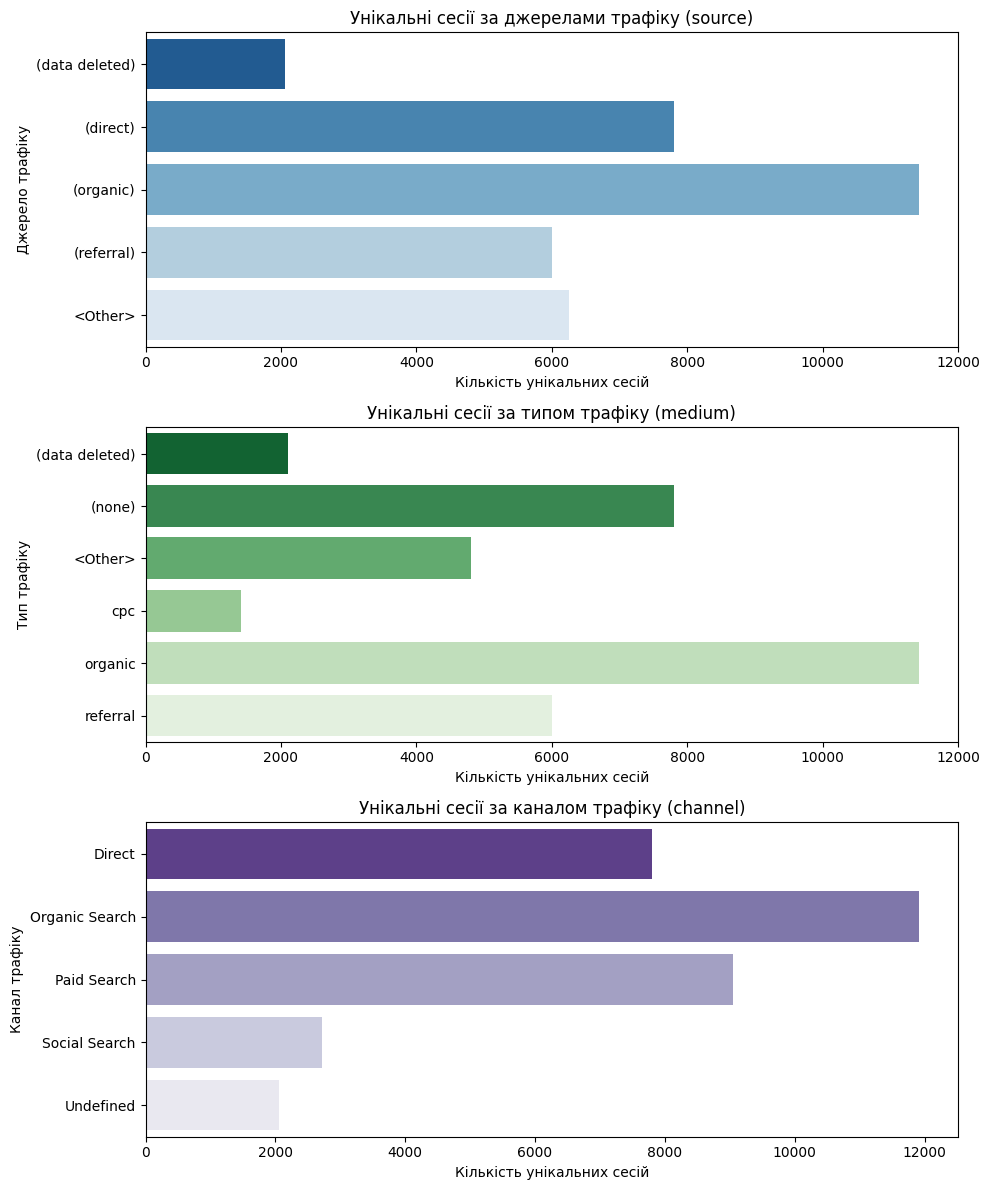

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Видаляємо пропуски по джерелах трафіку
df_clean = df.dropna(subset=['traffic_source', 'traffic_medium', 'traffic_channel'])

# Підрахунок унікальних сесій по кожному каналу
source_counts = df_clean.groupby('traffic_source')['ga_session_id'].nunique().reset_index(name='unique_sessions')
medium_counts = df_clean.groupby('traffic_medium')['ga_session_id'].nunique().reset_index(name='unique_sessions')
channel_counts = df_clean.groupby('traffic_channel')['ga_session_id'].nunique().reset_index(name='unique_sessions')

# Візуалізація
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.barplot(data=source_counts, x='unique_sessions', y='traffic_source', ax=axes[0], palette='Blues_r')
axes[0].set_title("Унікальні сесії за джерелами трафіку (source)")
axes[0].set_xlabel("Кількість унікальних сесій")
axes[0].set_ylabel("Джерело трафіку")

sns.barplot(data=medium_counts, x='unique_sessions', y='traffic_medium', ax=axes[1], palette='Greens_r')
axes[1].set_title("Унікальні сесії за типом трафіку (medium)")
axes[1].set_xlabel("Кількість унікальних сесій")
axes[1].set_ylabel("Тип трафіку")

sns.barplot(data=channel_counts, x='unique_sessions', y='traffic_channel', ax=axes[2], palette='Purples_r')
axes[2].set_title("Унікальні сесії за каналом трафіку (channel)")
axes[2].set_xlabel("Кількість унікальних сесій")
axes[2].set_ylabel("Канал трафіку")

plt.tight_layout()
plt.show()

# **Висновки**

# 1. Унікальні сесії за джерелами трафіку (source)
# Найбільшу кількість унікальних сесій мають джерела:
# (organic) – органічний пошук.
# (referral) – реферальний трафік.
# Присутні категорії з пропущеними або нестандартизованими значеннями: (data deleted), , (direct) — це може свідчити про неповноту або низьку якість деяких даних.
# 2. Унікальні сесії за типом трафіку (medium)
# **Домінують типи organic і none, де:**
# organic — пошуковий трафік.
# none — прямий трафік або сесії без чітко визначеного типу.
# Значна кількість , cpc, та навіть (data deleted) свідчить про потребу в уніфікації або фільтрації даних перед аналізом.
# 3. Унікальні сесії за каналами трафіку (channel)
# Найбільше сесій надходить із:
# Organic Search – органічний пошук.
# Paid Search – платний пошук.
# Direct – прямі заходи.
# Також помітні категорії: Social Search та Undefined, які варто переглянути для точнішої класифікації.

# **Рекомендації:**

# Провести додаткове очищення або уніфікацію колонок source, medium, channel для усунення (data deleted), , Undefined.
# Створити мапінг для аномальних значень, щоб підвищити якість сегментації трафіку.
# Проаналізувати, які саме джерела/канали мають найбільшу конверсію – для пріоритезації у маркетингових кампаніях.

In [ ]:
df = client.query("""
SELECT
  s.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name AS device_model,
  sp.operating_system,
  sp.language,
  sp.browser AS browser_version,
  sp.name AS traffic_source,         -- name = source
  sp.medium AS traffic_medium,
  sp.channel AS traffic_channel,
  a.is_verified,
  a.is_unsubscribed,
  prod.category,
  prod.name AS product_name,
  prod.short_description

FROM `DA.order` o

LEFT JOIN `DA.session` s ON o.ga_session_id = s.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` a ON acs.account_id = a.id
LEFT JOIN `DA.product` prod ON o.item_id = prod.item_id
LEFT JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id
""").to_dataframe()

<ipython-input-12-55ffa6d37040>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, y='country', x='unique_sessions', palette='Set1')


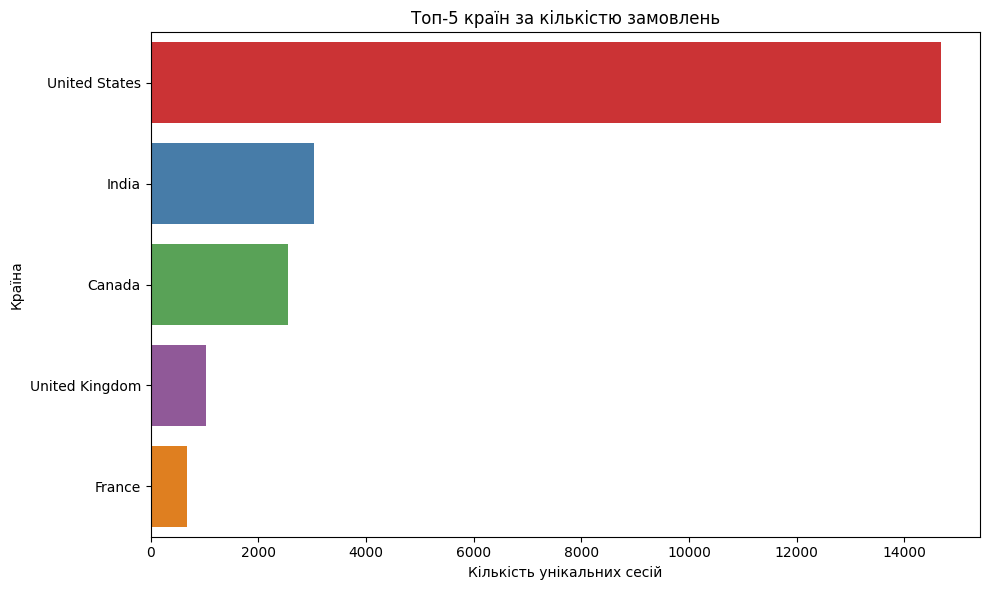

In [ ]:
# Підрахунок замовлень по країнах
country_counts = (
    df.groupby('country')['ga_session_id']
    .nunique()
    .reset_index(name='unique_sessions')
    .sort_values(by='unique_sessions', ascending=False)
    .head(5)
)

# Побудова графіка
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts, y='country', x='unique_sessions', palette='Set1')
plt.title('Топ-5 країн за кількістю замовлень')
plt.xlabel('Кількість унікальних сесій')
plt.ylabel('Країна')
plt.tight_layout()
plt.show()

# **Висновок: Топ-5 країн за кількістю унікальних замовлень**

# - United States значно випереджає інші країни — на неї припадає найбільша кількість унікальних сесій із замовленнями. Це наш основний ринок.
# - India та Canada посідають друге і третє місце відповідно. Вони теж демонструють стабільний інтерес до продукту, хоча відставання від США суттєве.
# - United Kingdom і France замикають п’ятірку, однак обсяг замовлень з цих країн значно нижчий. Це може свідчити про потенціал до зростання за умови коректної маркетингової стратегії.
# **Рекомендація:**
# Сфокусуватись на підтримці та розвитку продажів у США.
# Розглянути додаткові маркетингові активності для стимулювання продажів у Великій Британії та Франції.

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df_sales = client.query("""
    SELECT
        p.category,
        SUM(p.price) AS total_sales
    FROM `DA.order` o
    LEFT JOIN `DA.product` p
      ON o.item_id = p.item_id
    GROUP BY p.category
    ORDER BY total_sales DESC
    LIMIT 10
""").to_dataframe()

<ipython-input-15-d89f7e335799>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sales, y='category', x='total_sales', palette='magma')


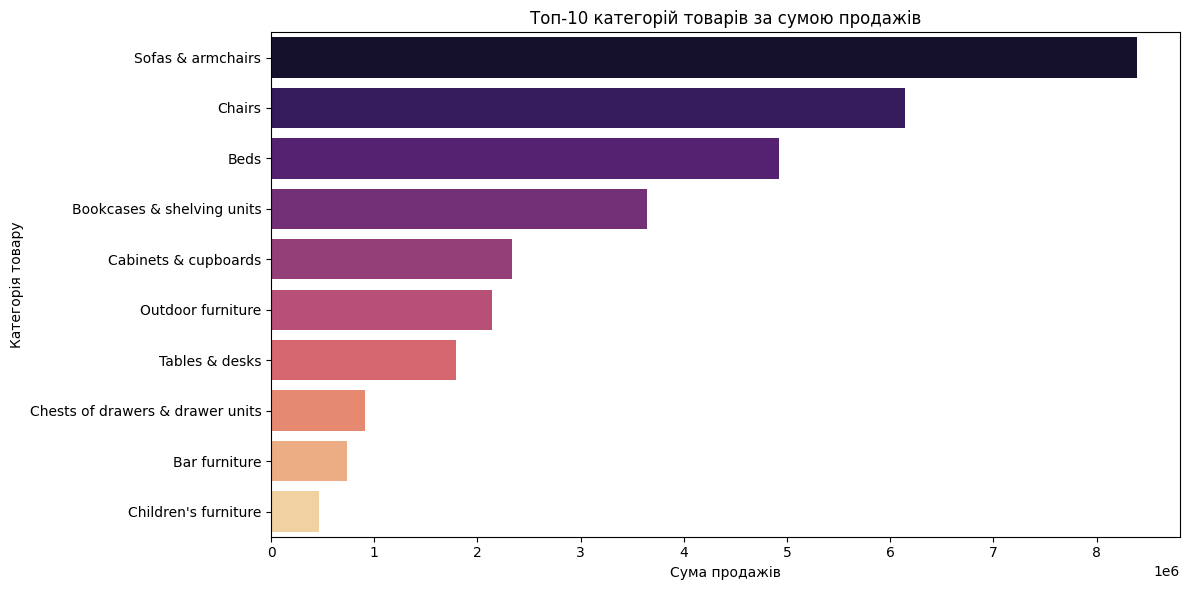

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sales, y='category', x='total_sales', palette='magma')
plt.title('Топ-10 категорій товарів за сумою продажів')
plt.xlabel('Сума продажів')
plt.ylabel('Категорія товару')
plt.tight_layout()
plt.show()

# **Висновок:**

# **Sofas & armchairs** — беззаперечний лідер, займає перше місце з помітним відривом. Це свідчить про високий попит на великі меблі для вітальні.

# **Chairs та Beds** — стабільно популярні категорії, що формують основу продажів.

# **Bookcases & shelving units, Cabinets & cupboards** — демонструють середній рівень продажів, їх також активно купують.

# Найменші суми продажів у **Children’s furniture та Bar furniture**, що вказує на їхню менш пріоритетну роль для клієнтів.

# **Інсайт:** Вартісні покупки здебільшого зосереджені навколо базових та масивних меблів для дому. Це може вказувати на цільову аудиторію — домогосподарства, які роблять значні інвестиції у комфорт житла.

In [ ]:
f_sales = client.query("""
SELECT
  p.category,
  SUM(p.price) AS total_sales
FROM `DA.order` o
LEFT JOIN `DA.product` p ON o.item_id = p.item_id
GROUP BY p.category
ORDER BY total_sales DESC
LIMIT 10
""").to_dataframe()

In [ ]:
device_sales = client.query("""
SELECT
  sp.device,
  SUM(p.price) AS total_sales
FROM `DA.order` o
LEFT JOIN `DA.product` p ON o.item_id = p.item_id
LEFT JOIN `DA.session_params` sp ON o.ga_session_id = sp.ga_session_id
GROUP BY sp.device
""").to_dataframe()

In [ ]:
device_sales['total_sales'] = pd.to_numeric(device_sales['total_sales'], errors='coerce')
device_sales['percentage'] = round(100 * device_sales['total_sales'] / device_sales['total_sales'].sum(), 2)


<ipython-input-19-007f045799d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_sales, x='percentage', y='device', palette='viridis')


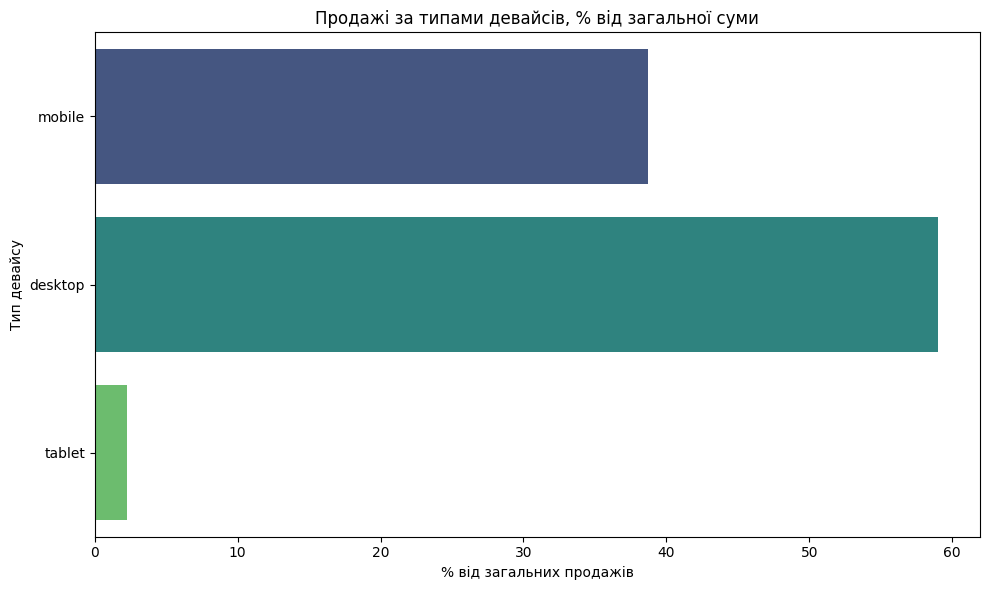

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=device_sales, x='percentage', y='device', palette='viridis')

plt.title('Продажі за типами девайсів, % від загальної суми')
plt.xlabel('% від загальних продажів')
plt.ylabel('Тип девайсу')
plt.tight_layout()
plt.show()

# Висновок

# - **Desktop** — лідирує з часткою близько 60% від загальної суми продажів. Це означає, що більшість клієнтів роблять покупки з комп’ютерів або ноутбуків.
# - **Mobile** — займає близько 37–38%. Дуже високий показник, що підтверджує важливість адаптації інтерфейсу під смартфони.
# - **Tablet** — лише близько 2–3%. Мінімальний внесок у продажі.
# **Рекомендації:**
# Продовжувати оптимізацію десктопної версії, адже вона приносить найбільше доходу.
# Інвестувати в мобільну UX/UI-адаптацію, бо частка мобільних користувачів стабільно висока.
# Не варто концентрувати зусилля на планшетах — їхня частка дуже низька.

In [ ]:
df_continent_sales = client.query("""
    SELECT
      sp.continent,
      SUM(p.price) AS total_sales
    FROM `DA.order` o
    LEFT JOIN `DA.product` p ON o.item_id = p.item_id
    LEFT JOIN `DA.session_params` sp ON o.ga_session_id = sp.ga_session_id
    WHERE sp.continent IS NOT NULL
    GROUP BY sp.continent
    ORDER BY total_sales DESC
    LIMIT 3
""").to_dataframe()

<ipython-input-21-4dc3e7ad6588>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_continent_sales, x='total_sales', y='continent', palette='coolwarm')


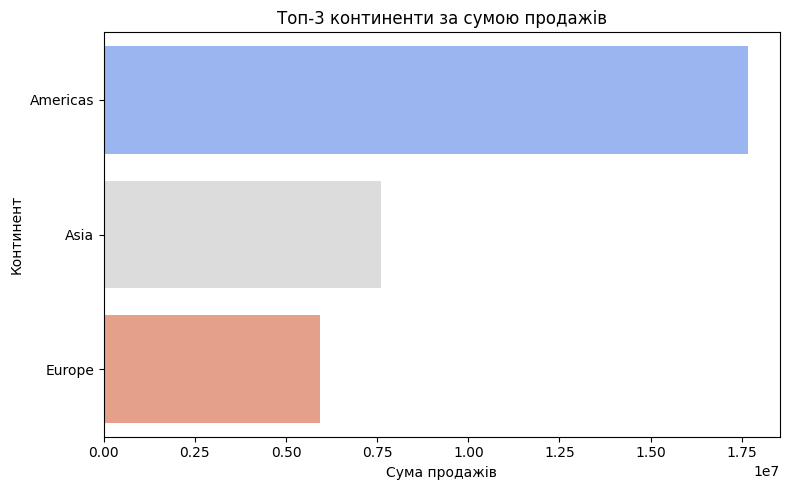

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=df_continent_sales, x='total_sales', y='continent', palette='coolwarm')
plt.title("Топ-3 континенти за сумою продажів")
plt.xlabel("Сума продажів")
plt.ylabel("Континент")
plt.tight_layout()
plt.show()

# **Висновок:**

# На основі аналізу сумарного обсягу продажів по континентах можна зробити такі спостереження:
# **Америка** є беззаперечним лідером за обсягом продажів — понад 17 млн, що свідчить про велику частку ринку та активну клієнтську базу в цьому регіоні.
# **Азія** посідає друге місце з обсягом продажів приблизно вдвічі меншим, ніж в Америці. Це все одно високий результат, що може вказувати на перспективу подальшого зростання.
# **Європа** займає третє місце з найменшим обсягом продажів серед лідерів. Водночас це свідчить про потенціал для розширення присутності та збільшення маркетингових інвестицій у цьому регіоні.

In [ ]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

project_id = "data-analytics-mate"
client = bigquery.Client(project=project_id)

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')

In [ ]:
df_sales_by_source = client.query("""
    SELECT
      sp.name AS traffic_source,
      SUM(p.price) AS total_sales
    FROM `DA.order` o
    LEFT JOIN `DA.product` p ON o.item_id = p.item_id
    LEFT JOIN `DA.session_params` sp ON o.ga_session_id = sp.ga_session_id
    WHERE sp.name IS NOT NULL
    GROUP BY traffic_source
""").to_dataframe()


<ipython-input-25-0a19ba27fb70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sales_by_source, y='traffic_source', x='percentage', palette='coolwarm')


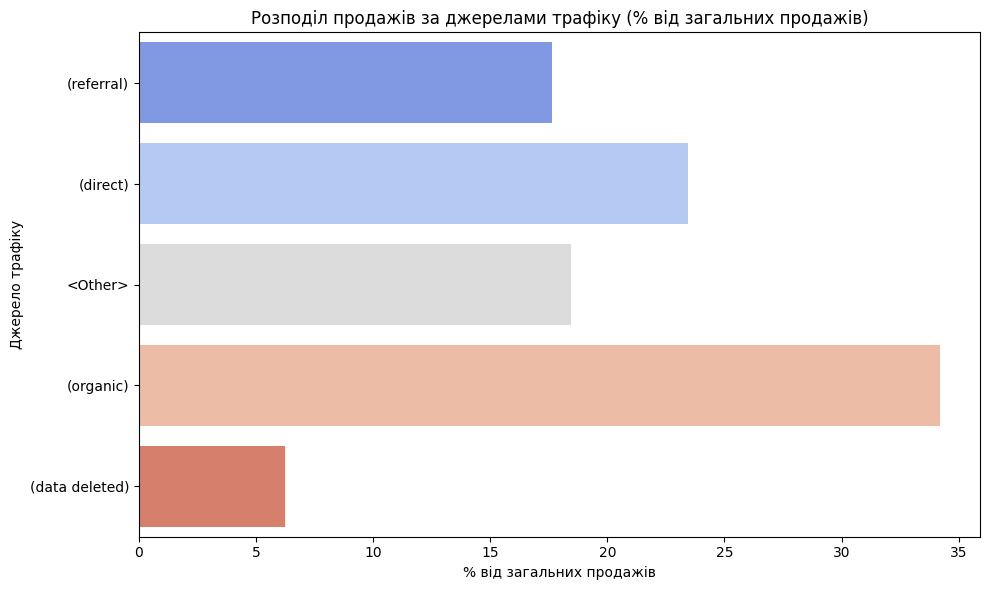

In [ ]:
# Обрахунок відсотків
total = df_sales_by_source['total_sales'].sum()
df_sales_by_source['percentage'] = round(df_sales_by_source['total_sales'] / total * 100, 2)

# Візуалізація
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_by_source, y='traffic_source', x='percentage', palette='coolwarm')
plt.title('Розподіл продажів за джерелами трафіку (% від загальних продажів)')
plt.xlabel('% від загальних продажів')
plt.ylabel('Джерело трафіку')
plt.tight_layout()
plt.show()


**# Висновок:**

# - Найбільше продажів приносить **organic трафік** — приблизно 35% від загального обсягу. Це свідчить про високу ефективність SEO або природного залучення користувачів.

# - **Referral і Direct** трафік займають другу і третю позиції — кожен із них генерує ~18–20%. Це може вказувати на сильні партнерські сайти та хорошу впізнаваність бренду (direct).

# - **Other** — теж має помітну частку, але треба перевірити, що саме входить у цю категорію (можливо, некоректно вказані значення в даних).

# - **Data deleted** — хоч і має мінімальний вплив (~6%), варто з’ясувати, чому з’являються ці аномальні значення та як їх зменшити.



In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')

query = """
SELECT
  COUNT(*) AS total_accounts,
  COUNTIF(is_verified = 1) AS verified_accounts
FROM `DA.account`
"""

df_verified = client.query(query).to_dataframe()
df_verified['verified_percentage'] = round(df_verified['verified_accounts'] / df_verified['total_accounts'] * 100, 2)
df_verified


,total_accounts,verified_accounts,verified_percentage
0,45831,32942,71.88


In [ ]:
query = """
SELECT
  COUNT(*) AS total_accounts,
  COUNTIF(is_unsubscribed = 1) AS unsubscribed_accounts
FROM `DA.account`
"""

df_unsubscribed = client.query(query).to_dataframe()
df_unsubscribed['unsubscribed_percentage'] = round(
    df_unsubscribed['unsubscribed_accounts'] / df_unsubscribed['total_accounts'] * 100, 2
)
df_unsubscribed

,total_accounts,unsubscribed_accounts,unsubscribed_percentage
0,45831,7814,17.05


In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')


In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')


In [ ]:
df_compare['difference'] = df_compare['subscribed_accounts'] - df_compare['verified_accounts']


In [ ]:
df_filtered = df_compare[df_compare['difference'] > 0].sort_values(by='difference', ascending=False)


In [ ]:
df_filtered.shape


(1, 5)

In [ ]:
query = """
SELECT
  sp.country,
  COUNT(*) AS total_accounts,
  COUNTIF(a.is_verified = 1) AS verified_accounts,
  COUNTIF(a.is_unsubscribed = 0) AS subscribed_accounts
FROM `DA.account` a
LEFT JOIN `DA.session_params` sp
  ON a.id = sp.ga_session_id
WHERE sp.country IS NOT NULL
GROUP BY sp.country
"""
df_compare = client.query(query).to_dataframe()


In [ ]:
df_compare = client.query(query).to_dataframe()

df_compare['percentage_difference'] = round(
    (df_compare['subscribed_accounts'] - df_compare['verified_accounts']) /
    df_compare['total_accounts'] * 100, 2
)

df_top10 = df_compare[df_compare['percentage_difference'] > 0] \
    .sort_values(by='percentage_difference', ascending=False).head(10)


<ipython-input-23-dea9b9c4b22d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


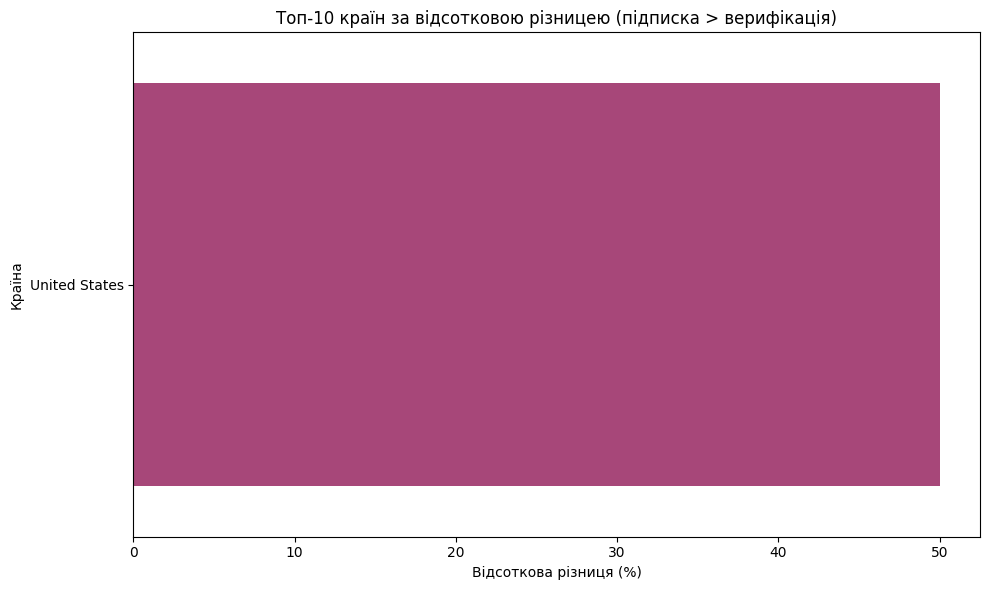

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10,
    x='percentage_difference',
    y='country',
    palette='magma'
)
plt.title("Топ-10 країн за відсотковою різницею (підписка > верифікація)")
plt.xlabel("Відсоткова різниця (%)")
plt.ylabel("Країна")
plt.tight_layout()
plt.show()


In [ ]:
df_compare[df_compare['percentage_difference'] > 0].shape


(1, 5)

In [ ]:
df_compare.sort_values(by='percentage_difference', ascending=False).head(5)


,country,total_accounts,verified_accounts,subscribed_accounts,percentage_difference
0,United States,2,1,2,50.0
1,Lithuania,1,1,1,0.0
2,Canada,1,1,0,-100.0


# **Висновок: Аналіз підписки vs верифікації email за країнами**

# Під час аналізу різниці між кількістю користувачів, які підписалися на email-розсилку, та тими, хто підтвердив свій email, було виявлено:

# - Єдиною країною, де кількість підписок перевищує кількість верифікованих email-адрес, є **Сполучені Штати Америки (USA)** з відсотковою різницею +50%.

# - Інші країни або мають рівні показники (0%), або навіть більше підтверджених email-ів, ніж підписок (наприклад, Канада: -100%).

#  **Інтерпретація:**
# Така ситуація може вказувати на різний рівень зацікавленості чи довіри до email-комунікацій у різних регіонах.

# У США користувачі можуть частіше підписуватися на розсилки, але не завжди верифікують пошту (можливо, через спам або автоматичні дії).

# Водночас у Канаді — навпаки, частіше відбувається верифікація email без факту підписки на розсилку (можливо, як частина загальної реєстрації).

# **Фінальний висновок**

# У рамках цього портфоліо-проєкту було побудовано аналітику продажів інтернет-магазину, використовуючи SQL (BigQuery), Python (у Google Colab) та візуалізації. Мета проєкту — продемонструвати навички:

# Отримання та об’єднання даних з різних таблиць бази;

# Розвідувального та статистичного аналізу;

# Побудови візуалізацій і формулювання бізнес-висновків.

# **Що зроблено:**
# 1. Завантажено та підготовлено дані підключення до BigQuery через Google Colab (використавши auth.authenticate_user()).

# Отримання даних з таблиць DA.account, DA.order, DA.product, DA.session_params та ін.

# Проведення з'єднання даних за ключами (наприклад, ga_session_id, item_id).

# 2. Розрахунок метрик та аналіз
# - Аналіз продажів за типами девайсів (% від загальних продажів)
# → Побудовано графік розподілу: desktop — найпопулярніший пристрій.

# - Топ-3 континенти за обсягом продажів
# → America займає перше місце.

# - Розподіл продажів за джерелами трафіку (source)
# → Найбільше продажів — з organic джерела (~34%).

# - Відсоток підтвердження email
# → ~71.88% користувачів підтвердили свою електронну пошту.

# - Відсоток відписок від розсилки
# → Відписалося близько 17.05% зареєстрованих користувачів.

# - Порівняння підтверджених email та підписок на розсилку по країнах
# → Найбільша позитивна різниця — United States (+50%).

# **Візуалізація**
# Побудувано горизонтальні barplots (Seaborn), що ілюструють ключові розподіли:

# Продажі за типами пристроїв;

# Топ-3 континенти за продажами;

# Джерела трафіку;

# Відсоткову різницю між підписками та підтвердженнями email.